# Heart Disease Prediction

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

## Importing dependencies
We import a few dependencies like numpy, pandas, matplotlib, seaborn.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fetching data from a github gist. The data is available in the dataset.csv file

In [2]:
!wget https://gist.githubusercontent.com/dewanshrawat15/82cabe2b4c46f3385afd46665c1e3400/raw/16b617861a66c6bba12422b752b01929bd93d2fe/dataset.csv

--2020-05-27 12:48:54--  https://gist.githubusercontent.com/dewanshrawat15/82cabe2b4c46f3385afd46665c1e3400/raw/16b617861a66c6bba12422b752b01929bd93d2fe/dataset.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11020 (11K) [text/plain]
Saving to: ‘dataset.csv.5’

dataset.csv.5       100%[===================>]  10.76K  --.-KB/s    in 0s      

2020-05-27 12:48:54 (84.9 MB/s) - ‘dataset.csv.5’ saved [11020/11020]



## Loading our dataset
We load the dataset from the dataset.csv file. We load our dataset into a Pandas DataFrame object.

In [0]:
df = pd.read_csv("dataset.csv")

### Describing our dataset
We display the first 10 entries of the DataFrame object and display the summary of the dataset.

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Counting null values

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
features = [x for x in df.columns if x != 'target']

## Finding relation between the target and features
We plot different graphs to see how the target feature vary with different features.

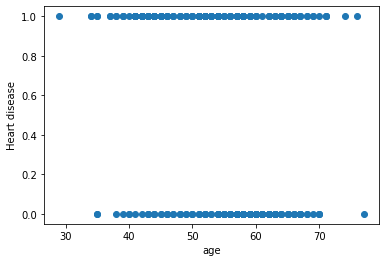

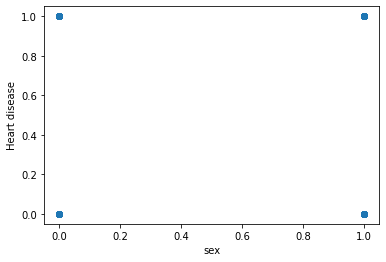

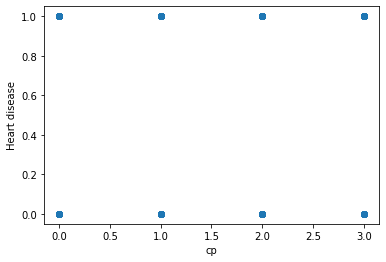

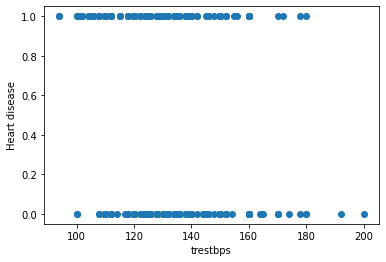

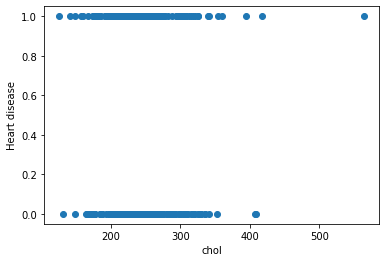

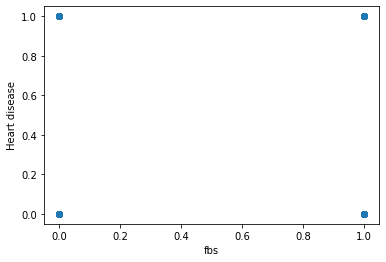

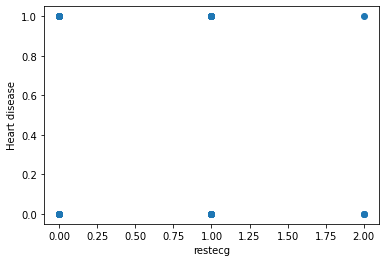

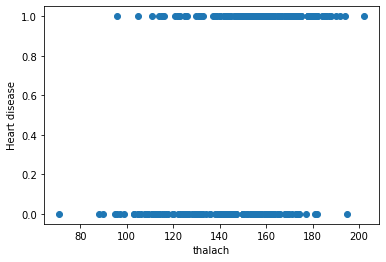

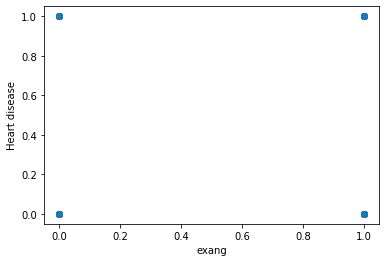

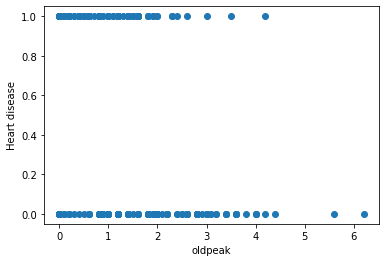

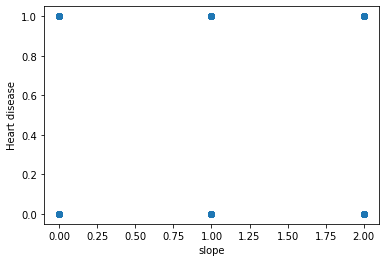

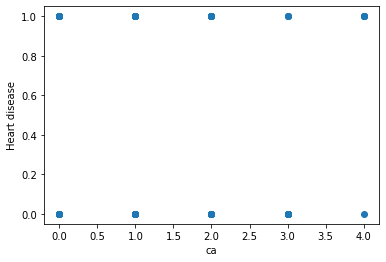

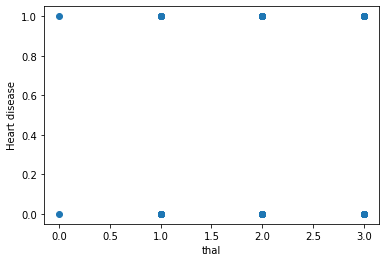

In [8]:
y = df['target']
for i in features:
  x = df[i]
  plt.xlabel(i)
  plt.ylabel("Heart disease")
  plt.scatter(x, y)
  plt.show()

## Using heatmaps
Graphs can give a pretty fair picture about the relationship between the targetted data and the feature. But using a heatmap shows a more accurate picture about the correlation between different features and the target variable.

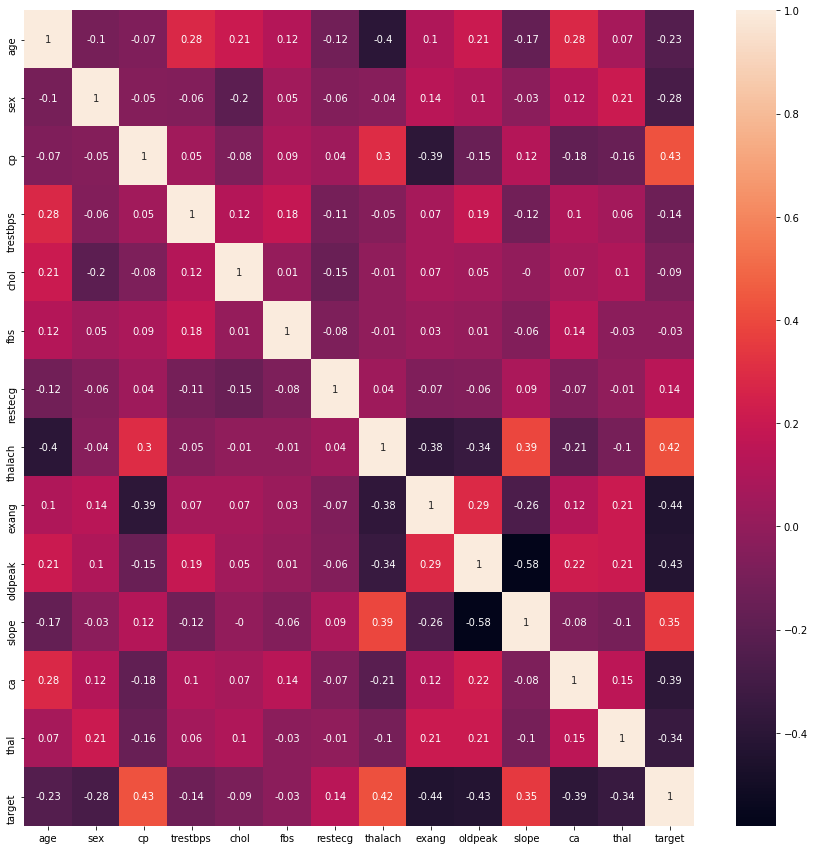

In [9]:
plt.figure(figsize=(15, 15))
corr_mat = df.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

## Selecting features having good corelation factor
We select those features which have a good correlation factor with the target variable


In [0]:
selected_features = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Let's see how different selected features of the dataset depend and vary with each other.

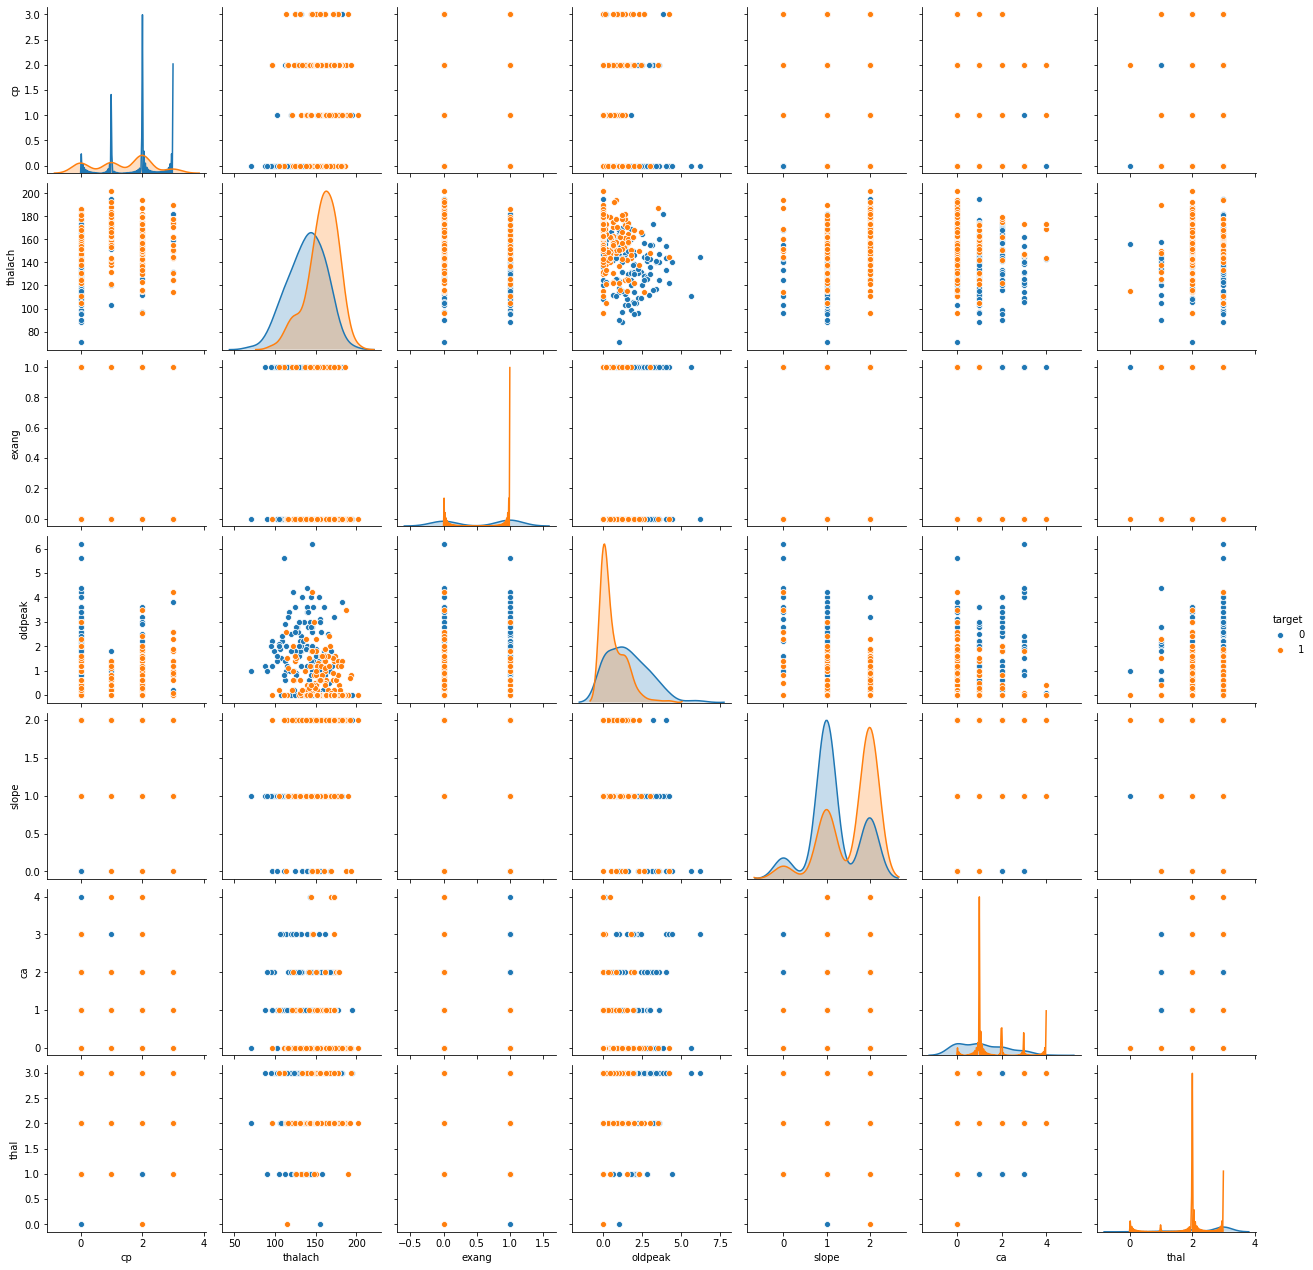

In [11]:
sns.pairplot(df, hue='target', vars=selected_features)

## Conclusion from Graphs and Heatmaps
We shape our X and Y variables according to the selected features and target variable.

In [0]:
X = df[selected_features]
Y = df['target']

## Splitting the dataset
We use train_test_split to test our dataset into training and testing variables.

In [0]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

## Training a KNN Model
We try training a KNN Model for our dataset.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1, 18):
  knnModel = KNeighborsClassifier(n_neighbors=i)
  knnModel.fit(X_train, Y_train)
  score = knnModel.score(x_test, y_test)
  scores.append(score)
max(scores)

0.75

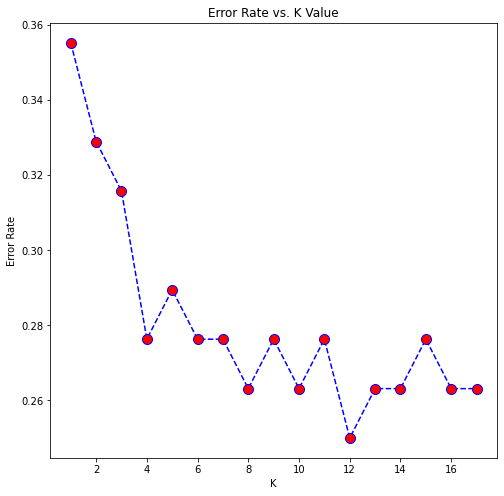

In [15]:
errors = [(1 - x) for x in scores]
plt.figure(figsize=(8, 8))
plt.plot(range(1, 18), errors, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')
plt.show()

## Training a Logistic Regression Model
We try training a Logistic Regression Model for our dataset.

In [16]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression(max_iter=1200)
lrModel.fit(X_train, Y_train)
lrModel.score(x_test, y_test)

0.8026315789473685

We see that Logistic Regression and KNN at best offer an accuracy of 80%. Let's try standard scaling our X variable and then training a KNN Model and Logistic Regression Model.

## Standard Scaling
We standard scale our X variable and try to use that to increase the efficiency of our models.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in selected_features:
  X[i] = scaler.fit_transform(np.asarray(X[i]).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

## Splitting our dataset
We split our dataset into training and testing variables.

In [0]:
scaled_x_train, scaled_x_test, scaled_y_train, scaled_y_test = train_test_split(X, Y, random_state=4, test_size=0.3)

## Training a Logistic Regression Model
We try training a new Logistic Regression model using the new scaled values.

In [19]:
newLrModel = LogisticRegression()
newLrModel.fit(scaled_x_train, scaled_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
newLrModel.score(scaled_x_test, scaled_y_test)

0.7802197802197802

Our model fares with a score of 0.78

## Training a KNN Model
We try training a new KNN Model using the newly scaled values.

In [21]:
scores = []
for i in range(1, 8):
  newKnnModel = KNeighborsClassifier(n_neighbors=i)
  newKnnModel.fit(scaled_x_train, scaled_y_train)
  score = newKnnModel.score(scaled_x_test, scaled_y_test)
  scores.append(score)

max(scores)

0.8791208791208791

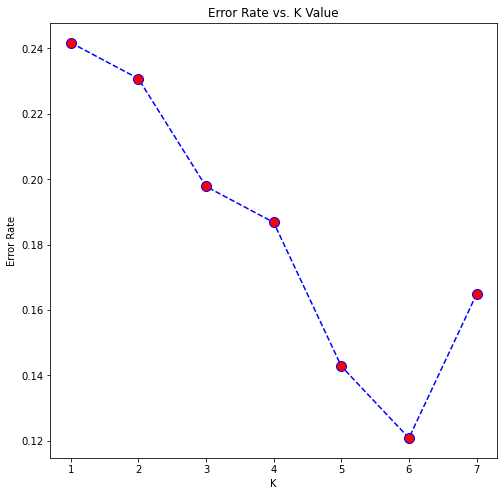

In [22]:
errors = [(1 - x) for x in scores]
plt.figure(figsize=(8, 8))
plt.plot(range(1, 8), errors, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')
plt.show()

We see that our KNN model fairs pretty well for a value of n = 6.

In [23]:
newKnnModel = KNeighborsClassifier(n_neighbors=6)
newKnnModel.fit(scaled_x_train, scaled_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

Making predictions on test set

In [0]:
y_hat = newKnnModel.predict(scaled_x_test)

In [25]:
newKnnModel.score(scaled_x_test, scaled_y_test)

0.8791208791208791

Plotting a roc curve and confusion matrix for the same

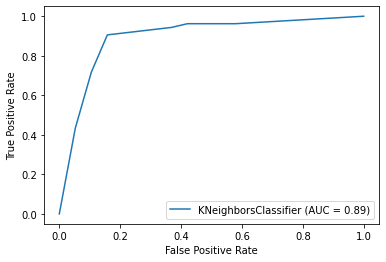

In [26]:
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
plot_roc_curve(newKnnModel, scaled_x_test, scaled_y_test)

### Calculating TF, TN, FP, FN
Writing a function to manually calculate the True Positives, False Positives, True Negatives and False Negatives.

In [0]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [28]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(scaled_y_test), np.asarray(y_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 0.8888888888888888
Recall is 0.9056603773584906
Specificity is 0.8421052631578947
Accuracy is 0.8791208791208791


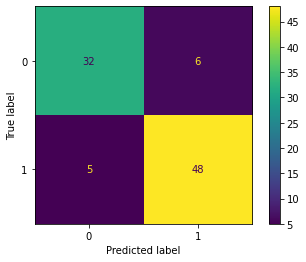

In [29]:
plot_confusion_matrix(newKnnModel, scaled_x_test, scaled_y_test)

### Visualising the model's performance
We plot the actual data and predicted data for different selected features.

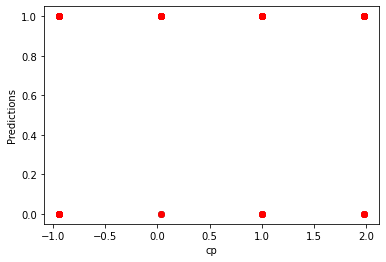

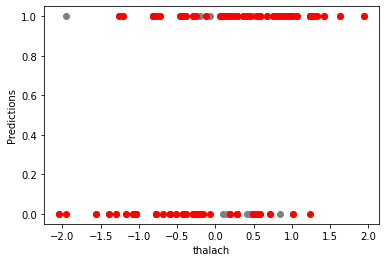

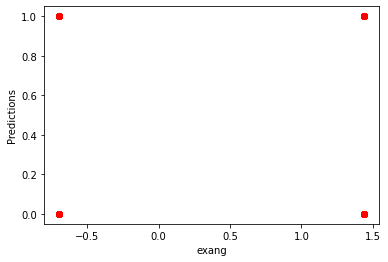

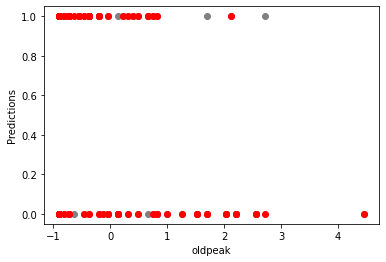

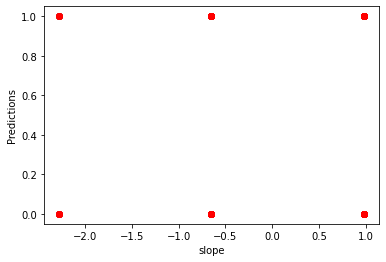

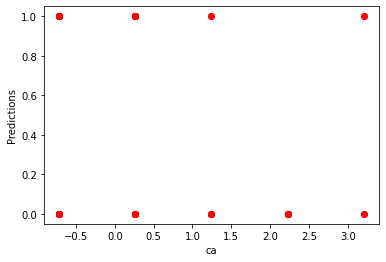

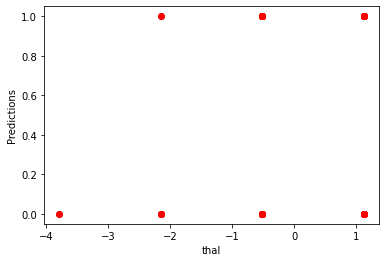

In [30]:
for i in selected_features:
  plt.scatter(scaled_x_test[i], scaled_y_test, color='grey')
  plt.scatter(scaled_x_test[i], y_hat, color='red')
  plt.xlabel(i)
  plt.ylabel("Predictions")
  plt.show()

# Conclusion
Trained two different models, one using K Nearest Neighbors and Logistic Regression. Displayed the correlation between different features in the dataset using heatmaps and graphs. Also calculated the accuracy, specificity indicating the accuracy for both models. Also, visualised our predictions in the form of a confusion matrix and a ROC curve.

We were able to train a model with about 87% accuracy for our given dataset, thus making fair predictions for people who are more prone to heart diseases.